# K-means

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# import matplotlib as mpl
# mpl.rcParams['image.cmap'] = 'gray'
# # mpl.rcParams.update({'font.size': 22})

In [2]:
# Couleurs ds bandes
c1 = np.array([
    [1, 0, 0, 1],
    [1, 0, 1, 1],
    [1, 0, 1, 1],
    [1, 0, 0, 1],
])
c2 = np.array([
    [0, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 1, 0, 0],
    [0, 1, 1, 0],
])

# Amplitude et bruit sur les bandes
def ab(c, o, a, s):
    b = np.random.normal(loc=0, scale=s, size=c.shape)
    b = np.round(b)
    c = o + a*c + b
    c = np.clip(c, 0, 255)
    return c
c1 = ab(c1, 50, 150, 30)
c2 = ab(c2, 50, 150, 30)

# Construction de l'image couleur
N, _ = c1.shape
c0 = np.zeros((N,N))
img = np.array([c1, c0, c2])
img = np.moveaxis(img, 0, -1)
img = img / 256

In [3]:
# Affichage de l'image
def plot_image(ax):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    for i in range(N):
        for j in range(N):
            ax.text(j, i, N*i+j+1,
                 fontsize=14, ha="center", va="center", color="w")
#     ax.set_title('Image')

In [4]:
# Affichage des bandes
def plot_data(ax):
    ax.imshow(c0, cmap="gray", vmin=-1, vmax=0)
    ax.set_xticks([])
    ax.set_yticks([])
    for i in range(N):
        for j in range(N):
            ax.text(j, i-.2, f'{c1[i,j]:.0f}', fontsize=14, ha="center", va="center", color=[1, 0, 0])
            ax.text(j, i+.2, f'{c2[i,j]:.0f}', fontsize=14, ha="center", va="center", color=[0, 0, 1])
    for i in range(3):
        ax.axvline(i+.5, color="lightgray")
        ax.axhline(i+.5, color="lightgray")
#     ax.set_title('Intensités')

In [5]:
# Affichage du nuage de points
def plot_scatter(ax, x, y, clr):
    ax.scatter(x, y, color=clr, marker='o', s=250, alpha=.6)
    for i in range(N):
        for j in range(N):
            plt.text(c1[i,j], c2[i,j], N*i+j+1,
                     fontsize=8, ha="center", va="center", color="w")
    ax.axis('square')
    ax.set_xlim([-15, 270])
    ax.set_ylim([-15, 270])
    ax.set_xlabel('Red', color=[1, 0, 0])
    ax.set_ylabel('Blue',  color=[0, 0, 1])
    ax.set_axisbelow(True)
    ax.grid(True)
#     ax.set_title("Intensités dans l'espace (rouge, bleu)")

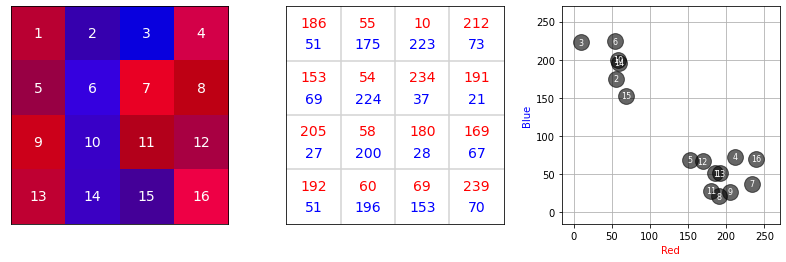

In [6]:
# Affichage de l'image
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
plot_image(axs[0])
plot_data(axs[1])
plot_scatter(axs[2], c1, c2, [0, 0, 0])
plt.savefig("tout.pdf", bbox_inches='tight')
plt.show()

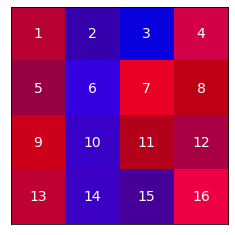

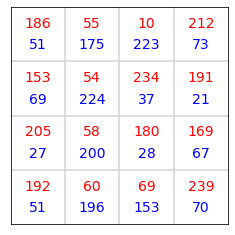

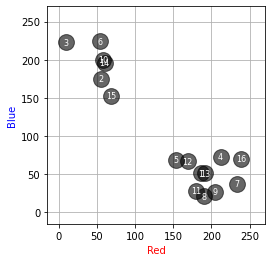

In [7]:
# Affichage des images séparées

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_image(ax)
plt.savefig("image.pdf", bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(ax)
plt.savefig("intensities.pdf", bbox_inches='tight')
plt.show()
          
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_scatter(ax, c1, c2, [0, 0, 0])
plt.savefig("scatter.pdf", bbox_inches='tight')
plt.show()

## Algo des K-moyennes

In [8]:
def affectation():
    
    for i in range(16):
        
        # Coordonnées du pixel
        x = np.ravel(c1)[i]
        y = np.ravel(c2)[i]
        
        # Distance
        d = np.zeros(K)
        for k in range(K):
            d[k] = np.sqrt( (x-centroids[k][0])**2 + (y-centroids[k][1])**2 )
            
        # Classe
        label[i] = np.argmin(d)

In [9]:
def majcentroides():
    
    # Pour chaque classe...
    for k in range(K):
        
        # Coordoonées
        idx = np.where(label==k)[0]
        x = np.ravel(c1)[idx]
        y = np.ravel(c2)[idx]
        
        # Moyennes
        centroids[k][0] = np.mean(x)
        centroids[k][1] = np.mean(y)

In [10]:
def displaykmeans(title, step, color=None, old_centroids=None):
    
    # Figure
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax.grid(True)
    ax.set_axisbelow(True)
            
    # Frontière ?
    if step == "A":
        
        # Point central
        middle_x = (centroids[0][0]+centroids[1][0]) / 2
        middle_y = (centroids[0][1]+centroids[1][1]) / 2
        
        # Pente
        dx = centroids[0][0] - centroids[1][0]
        dy = centroids[0][1] - centroids[1][1]
        slope = -dx/dy
        
        # Dessin
        plt.axline(xy1=(middle_x, middle_y), slope=slope, linewidth=1, color="black", linestyle="--")
    
    # Pour chaque classe...
    for k in range(K):
        
        # Coordoonées
        idx = np.where(label==k)[0]
        x = np.ravel(c1)[idx]
        y = np.ravel(c2)[idx]
        
        # Pixels
        if np.any(color) == None:
            plot_scatter(ax, x, y, clrs[k])
        else:
            plot_scatter(ax, x, y, color)
        
        # Centroïdes
        ax.scatter(centroids[k][0], centroids[k][1], marker='+', s=300, color=clrs[k], linewidth=3)
        
        # Flèche des centroïdes ?
        if step == "B":
            
            # Ancien centroïde
            ax.scatter(old_centroids[k][0], old_centroids[k][1], marker='+', s=200, color=clrs[k], linewidth=3, alpha=.4)
            
            # Coordonnées de la flèche totale
            x  = old_centroids[k][0]
            y  = old_centroids[k][1]
            dx = centroids[k][0] - x
            dy = centroids[k][1] - y
            L = np.sqrt(dx**2+dy**2)
            theta = np.arctan(dy/dx)
            
            if dx < 0:
                theta = theta + np.pi
            
            # Coordonnées de la flèche raccourcie de "space"
            space = 30
            L = L - space
            x = x + space/2 * np.cos(theta)
            y = y + space/2 * np.sin(theta)
            dx =          L * np.cos(theta)
            dy =          L * np.sin(theta)
            
            # Dessin de la flèche
            plt.arrow(x, y, dx, dy, width=.5, head_width=8, length_includes_head=True, color=clrs[k], alpha=.4, overhang=.5)
        
    # Petite beauté
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_title("")
        
    # Enregistrement
    plt.savefig(f"{title}.pdf", bbox_inches='tight')
    plt.show()

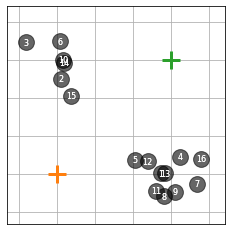

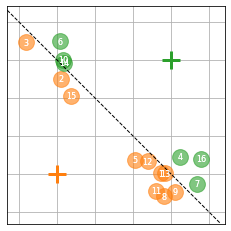

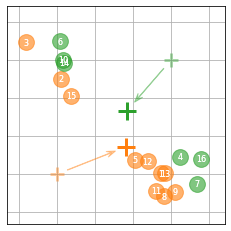

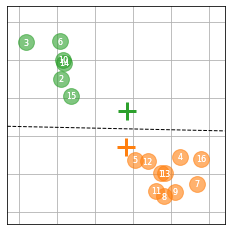

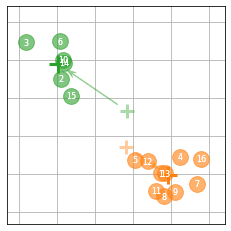

In [11]:
K = 2
#centroids = np.array([[128, 64], [128, 192]])
centroids = np.array([[50, 50], [200, 200]])
label = np.concatenate([[0]*8,[1]*8])
#clrs = np.array([[1, 0, 0], [0, 0, 1]])
clrs = np.array(["C1", "C2"])

num = displaykmeans("Initialisation", step="I", color=[0, 0, 0])

for i in range(2):
    
    affectation()
    displaykmeans(f"step-{i+1}A", step="A")
    
    old_centroids = centroids.copy()
    majcentroides()
    displaykmeans(f"step-{i+1}B", step="B", old_centroids=old_centroids)
    